# oefeningen Associatieregels

### vraag 1

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# a. Lees de gegevens in als een dataframe met de naam adultUCI
adultUCI = pd.read_csv('./data/AdultUCI.csv', delimiter=';')

In [34]:
# b. Bekijk de dataset
print(adultUCI.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  small  
1             0             0             

In [35]:
# c. Verwijder de volgende kolommen uit het dataframe als ze bestaan
adultUCI.drop(columns=['fnlwgt', 'education-num', 'capital-gain', 'capital-loss'], inplace=True)
adultUCI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      46033 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   hours-per-week  48842 non-null  int64 
 9   native-country  47985 non-null  object
 10  income          32561 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.1+ MB


In [36]:
# d. Zet de age kolom om naar klassen
age_breaks = [15, 25, 45, 65, 100]
age_labels = ["Young", "Middle-aged", "Senior", "Old"]
adultUCI['age'] = pd.cut(adultUCI['age'], bins=age_breaks, labels=age_labels, right=False)

# Zet de hours-per-week kolom om naar klassen
hours_breaks = [0, 25, 40, 60, 168]
hours_labels = ["Part-time", "Full-time", "Over-time", "Workaholic"]
adultUCI['hours-per-week'] = pd.cut(adultUCI['hours-per-week'], bins=hours_breaks, labels=hours_labels, right=False)

# Bekijk de aangepaste dataset
print(adultUCI.head())

           age         workclass  education      marital-status  \
0  Middle-aged         State-gov  Bachelors       Never-married   
1       Senior  Self-emp-not-inc  Bachelors  Married-civ-spouse   
2  Middle-aged           Private    HS-grad            Divorced   
3       Senior           Private       11th  Married-civ-spouse   
4  Middle-aged           Private  Bachelors  Married-civ-spouse   

          occupation   relationship   race     sex hours-per-week  \
0       Adm-clerical  Not-in-family  White    Male      Over-time   
1    Exec-managerial        Husband  White    Male      Part-time   
2  Handlers-cleaners  Not-in-family  White    Male      Over-time   
3  Handlers-cleaners        Husband  Black    Male      Over-time   
4     Prof-specialty           Wife  Black  Female      Over-time   

  native-country income  
0  United-States  small  
1  United-States  small  
2  United-States  small  
3  United-States  small  
4           Cuba  small  


In [37]:
# e. Zet het dataframe om naar een transactions object
transacties = pd.get_dummies(adultUCI, prefix='', prefix_sep='=')

# Bekijk het resultaat
print(transacties.head())

   =Young  =Middle-aged  =Senior   =Old  =Federal-gov  =Local-gov  \
0   False          True    False  False         False       False   
1   False         False     True  False         False       False   
2   False          True    False  False         False       False   
3   False         False     True  False         False       False   
4   False          True    False  False         False       False   

   =Never-worked  =Private  =Self-emp-inc  =Self-emp-not-inc  ...  =Scotland  \
0          False     False          False              False  ...      False   
1          False     False          False               True  ...      False   
2          False      True          False              False  ...      False   
3          False      True          False              False  ...      False   
4          False      True          False              False  ...      False   

   =South  =Taiwan  =Thailand  =Trinadad&Tobago  =United-States  =Vietnam  \
0   False    False      Fal

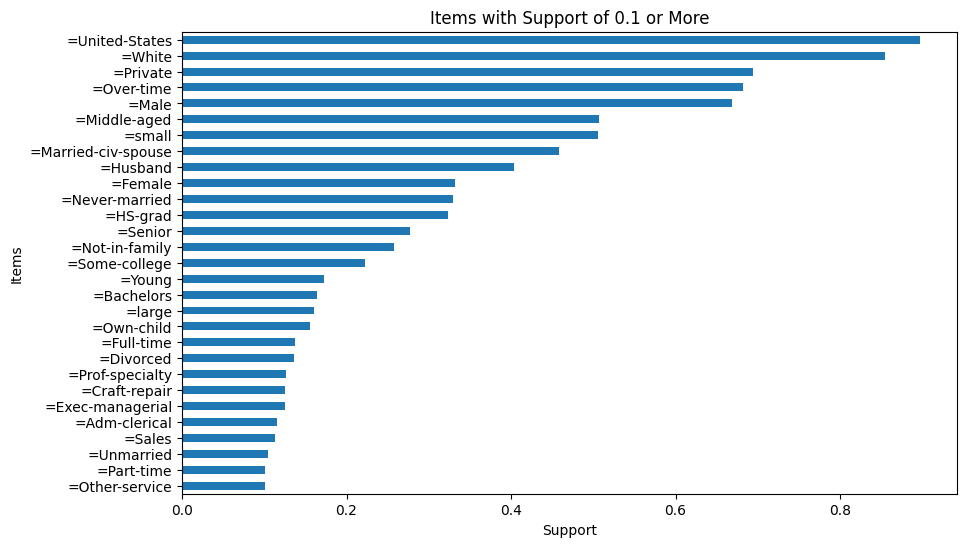

In [38]:
# f. Maak een barchart van alle items met een support van 0.1 of meer.
# Bereken support
support = transacties.mean()

# Filter items met support 0.1 of meer
frequent_items = support[support >= 0.1]

# bar chart
plt.figure(figsize=(10, 6))
frequent_items.sort_values().plot(kind='barh')
plt.xlabel('Support')
plt.ylabel('Items')
plt.title('Items with Support of 0.1 or More')
plt.show()

In [ ]:
# g. Welke twee items hebben een zeer hoge support? Kan je hieruit besluiten dat de afgenomen vragenlijst een goed voorbeeld van een aselecte steekproef?
#United states en White, er is dus een overpopulatie van blanke amerikanen

In [39]:
# h. Hoeveel regels heeft het algoritme gevonden?
from mlxtend.frequent_patterns import apriori, association_rules
#apriori algorithme
itemsets = apriori(transacties, min_support=0.05, use_colnames=True)

#associatie regels
rules = association_rules(itemsets, metric="confidence", min_threshold=0.6)

# gegeven filter function
def rule_filter(row, minlen, maxlen):
    length = len(row['antecedents']) + len(row['consequents'])
    return minlen <= length <= maxlen

# pas de filterfunctie toe
filtered_rules = rules[rules.apply(rule_filter, minlen=2, maxlen=3, axis=1)]

# Tel het aantal gefilterde regels
num_rules = len(filtered_rules)
print(f"Number of rules found: {num_rules}")

Number of rules found: 1191


In [40]:
# i. Bekijk de regels met de hoogste confidence? Wat valt er op?
# Sorteer de gefilterde regels op vertrouwen in aflopende volgorde
sorted_rules = filtered_rules.sort_values(by='confidence', ascending=False)

# Geef de belangrijkste regels met het grootste vertrouwen weer
top_rules = sorted_rules.head()
print(top_rules)

                      antecedents            consequents  antecedent support  \
357           (=Senior, =Husband)                (=Male)            0.156587   
960  (=Exec-managerial, =Husband)                (=Male)            0.066152   
661        (=Bachelors, =Husband)                (=Male)            0.074444   
740     (=Husband, =Some-college)                (=Male)            0.074895   
797  (=Exec-managerial, =Husband)  (=Married-civ-spouse)            0.066152   

     consequent support   support  confidence      lift  leverage  conviction  \
357            0.668482  0.156587         1.0  1.495926  0.051911         inf   
960            0.668482  0.066152         1.0  1.495926  0.021931         inf   
661            0.668482  0.074444         1.0  1.495926  0.024680         inf   
740            0.668482  0.074895         1.0  1.495926  0.024829         inf   
797            0.458192  0.066152         1.0  2.182493  0.035842         inf   

     zhangs_metric  
357       0

In [42]:
# k. Verwijder de kolom "relationship"
transacties.drop(columns=[col for col in transacties.columns if col.startswith('relationship=')], inplace=True)

# l. Voer het apriori algoritme opnieuw uit
itemsets = apriori(transacties, min_support=0.05, use_colnames=True)
rules = association_rules(itemsets, metric="confidence", min_threshold=0.6)

# Filterfunctie
def rule_filter(row, minlen, maxlen):
    length = len(row['antecedents']) + len(row['consequents'])
    return minlen <= length <= maxlen

# Pas de filterfunctie toe
filtered_rules = rules[rules.apply(rule_filter, minlen=2, maxlen=3, axis=1)]

# Vind de regel met de hoogste confidence
sorted_rules = filtered_rules.sort_values(by='confidence', ascending=False)
top_rule = sorted_rules.iloc[0]
print(f"Rule with highest confidence: {top_rule}")


Rule with highest confidence: antecedents           (=Senior, =Husband)
consequents                       (=Male)
antecedent support               0.156587
consequent support               0.668482
support                          0.156587
confidence                            1.0
lift                             1.495926
leverage                         0.051911
conviction                            inf
zhangs_metric                    0.393067
Name: 357, dtype: object


In [43]:
# m. Analyseer de lift van de topregel
lift_value = top_rule['lift']
print(f"Lift value of the top rule: {lift_value}")

Lift value of the top rule: 1.495926493108729


In [44]:
# n. Bepaal de verwachte leeftijdscategorie voor respondenten die overuren werken en een klein inkomen hebben
overtime_small_income = transacties[(transacties['hours-per-week=Over-time'] == 1) & (transacties['income=small'] == 1)]
age_distribution = overtime_small_income[['age=Young', 'age=Middle-aged', 'age=Senior', 'age=Old']].mean()
expected_age_category = age_distribution.idxmax()
certainty = age_distribution.max()
print(f"Expected age category: {expected_age_category}, Certainty: {certainty}")

KeyError: 'hours-per-week=Over-time'

In [46]:
# o. Beschrijf de lift van de regel die in de vorige stap is gebruikt
rule_lift = rules[(rules['antecedents'] == frozenset(['hours-per-week=Over-time', 'income=small'])) & (rules['consequents'].apply(lambda x: 'age=' + expected_age_category.split('=')[1] in x))]['lift'].values[0]
print(f"Lift of the rule: {rule_lift}")

NameError: name 'expected_age_category' is not defined

In [ ]:
# p. Controleer de frequentie van de combinatie van de drie items
combination_frequency = overtime_small_income.shape[0] / transacties.shape[0]
print(f"Frequency of the combination: {combination_frequency}")

In [ ]:
# q. Onderzoek of er regels zijn die betrekking hebben op hours-per-week=Workaholic
workaholic_rules = rules[rules['antecedents'].apply(lambda x: 'hours-per-week=Workaholic' in x)]
print(f"Rules involving hours-per-week=Workaholic: {workaholic_rules}")

### vraag 2

In [30]:
# a. Lees de dataset in
fruit_data = pd.read_csv('./data/fruitaankoop 20-21.csv', delimiter=';')

# Preprocess de data
# We gaan ervan uit dat de dataset in een transactioneel formaat is waarbij elke rij de top 3 fruitkeuzes van een student vertegenwoordigt
# Converteer de dataset naar een one-hot encoded formaat
fruit_transactions = pd.get_dummies(fruit_data, prefix='', prefix_sep='=')

# b. Genereer associatieregels met behulp van het apriori algoritme
itemsets = apriori(fruit_transactions, min_support=0.1, use_colnames=True)
rules = association_rules(itemsets, metric="confidence", min_threshold=0.3)

# Filter regels met minlen=2 en maxlen=2
rules['rule_length'] = rules['antecedents'].apply(lambda x: len(x)) + rules['consequents'].apply(lambda x: len(x))
filtered_rules = rules[(rules['rule_length'] == 2)]

# c. Vind de regel met de hoogste confidence
top_rule = filtered_rules.sort_values(by='confidence', ascending=False).iloc[0]

# d. Fruit voor promotie
fruit_promotion = list(top_rule['antecedents'])[0]

# e. Fruit om naast de promotie te plaatsen
fruit_next_to_promotion = list(top_rule['consequents'])[0]

# f. Bereken het percentage studenten met de combinatie in hun top 3
# Maak een kolom voor de combinatie van de twee fruitsoorten
combination_col = fruit_transactions[fruit_promotion] & fruit_transactions[fruit_next_to_promotion]
percentage_students = combination_col.mean() * 100

# g. Analyseer de lift
lift_value = top_rule['lift']

# Print resultaten
print(f"Fruit voor promotie: {fruit_promotion}")
print(f"Fruit om naast de promotie te plaatsen: {fruit_next_to_promotion}")
print(f"Percentage studenten met de combinatie in hun top 3: {percentage_students:.2f}%")
print(f"Lift waarde van de top regel: {lift_value:.2f}")

Fruit voor promotie: Ananas
Fruit om naast de promotie te plaatsen: Aardbei
Percentage studenten met de combinatie in hun top 3: 22.22%
Lift waarde van de top regel: 1.11
